# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# Your code here.
StudentID = list(range(1,11))
Age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
Tardies = [10, 2, 5, 9, 4, 2, 9, 6, 0, 3]

student_data = pd.DataFrame({'StudentID':StudentID, 'Age':Age, 'Tardies':Tardies})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,2
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


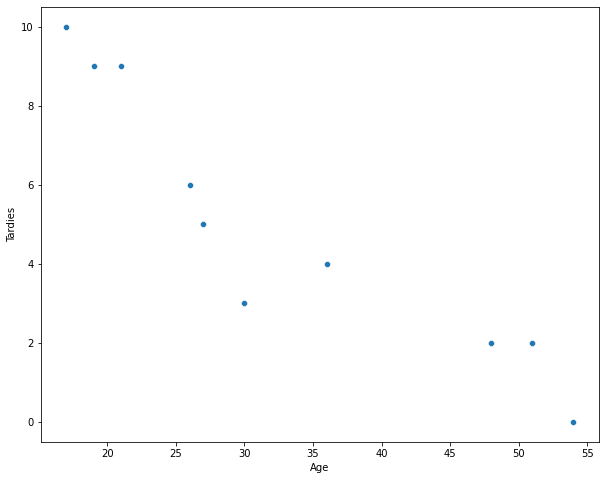

In [4]:
# Your code here.
plt.figure(figsize=(10, 8))
sns.scatterplot(student_data['Age'],student_data['Tardies']);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

### Your response here. 

Yes, there's a trend. If the student is older it is more puntual (have less Tardies)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
covariance = student_data[['Age','Tardies']].cov()
correlation = student_data[['Age','Tardies']].corr()
covariance
# print(f'Covariance is: {covariance}, and correlation is {correlation}')

,Age,Tardies
Age,187.655556,-43.555556
Tardies,-43.555556,11.777778


In [6]:
# Covariance isn't easy to interpret since it's squared and can't tell us much

In [7]:
correlation

,Age,Tardies
Age,1.00000,-0.92647
Tardies,-0.92647,1.00000


In [8]:
# Correlation in the other hand, tells us from -1 to 1 how much related are the variables.
# In this case, theres a strong inverse relation between Age and Tardies

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your response here.
x = student_data['Age']
y = student_data['Tardies']

linreg = stats.linregress(x, y)
print(linreg)

LinregressResult(slope=-0.23210373615963054, intercept=12.636212919651843, rvalue=-0.9264695851526767, pvalue=0.00011695010300387959, stderr=0.0333365427171924, intercept_stderr=1.1792374964456598)


In [10]:
linreg[2]**2 # R squared

0.858345892212973

In [11]:
# Ordinary Linear Regretion since there's only two variables and they have a strong correlation (inverse)
# The R squared value is 0.85, this means the regretion can well explain most of the values

Plot your regression model on your scatter plot.

Text(0, 0.5, 'Tardies')

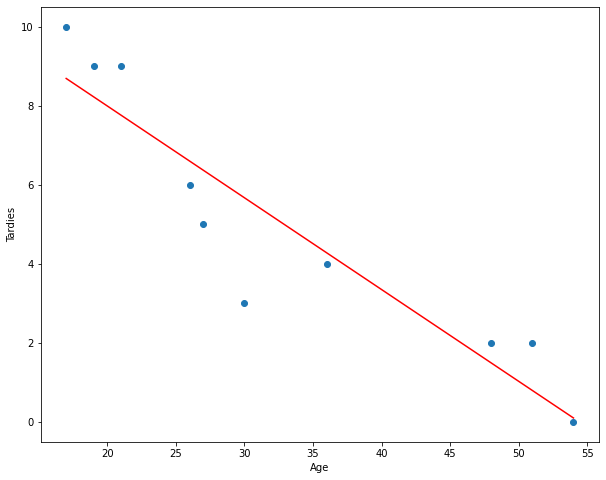

In [12]:
# Your code here.
m = linreg[0]
b = linreg[1]
x_ = np.linspace(x.min(), x.max(), num=50)
y_ = linreg[0]*x_+linreg[1] 
plt.figure(figsize=(10, 8))
plt.scatter(x, y)
plt.plot(x_,y_, c='r')
plt.xlabel('Age')
plt.ylabel('Tardies')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [13]:
# Your response here. 

# The model can explain 85% of the values, and we can conclude that the younger the student it'll probably be a latecomer.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [28]:
# Import any libraries you may need & the data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

vehicles = pd.read_csv('vehicles.csv')
vehicles.columns = vehicles.columns.str.replace(' ','_')
vehicles.head()

,Make,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels/Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams/Mile,Fuel_Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [15]:
# Your response here. 
variables = vehicles[['Year','Cylinders','Fuel_Barrels/Year','Combined_MPG','Fuel_Cost/Year']]
outcome = vehicles['CO2_Emission_Grams/Mile']
var2 = vehicles[['Year','Cylinders','Fuel_Barrels/Year','Combined_MPG','Fuel_Cost/Year','CO2_Emission_Grams/Mile']]
# var_out
var2.corr()

,Year,Cylinders,Fuel_Barrels/Year,Combined_MPG,Fuel_Cost/Year,CO2_Emission_Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel_Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined_MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel_Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2_Emission_Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [16]:
# Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions?

# It seems Fuel_Barrels/Year is the most important variable in determining CO2 emissions, but the number of cylinders, the fuel cost/year and the combiend MPG are important to

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [29]:
# Your response here. 
x = variables
y = outcome

model = LinearRegression()
model.fit(x, y)
predict = model.predict(x)
r2_score(y, predict)

0.9808734920269122

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [37]:
vehicles.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine_Displacement        0
Cylinders                  0
Transmission               0
Drivetrain                 0
Vehicle_Class              0
Fuel_Type                  0
Fuel_Barrels/Year          0
City_MPG                   0
Highway_MPG                0
Combined_MPG               0
CO2_Emission_Grams/Mile    0
Fuel_Cost/Year             0
dtype: int64

In [38]:
# Your response here. 
x = sm.add_constant(vehicles[['Year','Cylinders','Fuel_Barrels/Year','Combined_MPG','Fuel_Cost/Year']])
y = vehicles['CO2_Emission_Grams/Mile']

modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2_Emission_Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                             12:28:43   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [19]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [20]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [21]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [22]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [23]:
# Your response here. 